# Data Clearning and Visualization

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
import os

PRO_DIR = os.path.join('/','work', 'Labs', 'lab1')

if not os.path.isdir(PRO_DIR):
    os.makedirs(PRO_DIR)

os.chdir(PRO_DIR)

DATA_DIR = os.path.join(PRO_DIR, 'dataset')
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)

In [ ]:
DATA_CSV = os.path.join(DATA_DIR, 'data.csv')

In [ ]:
LINK = 'https://raw.githubusercontent.com/tarunlnmiit/machine_learning/master/DataPreprocessing.csv'

In [ ]:
import urllib
urllib.request.urlretrieve(LINK, DATA_CSV)

('/work/Labs/lab1/dataset/data.csv',
 <http.client.HTTPMessage at 0x7f346c4e8c50>)

In [ ]:
data = pd.read_csv(DATA_CSV)
data

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
data2 = data.copy()

data2 = imp.fit_transform(data2, )
data2 = pd.DataFrame(data2, columns=['Region', 'Age', 'Income', 'Online Shopper'])

In [ ]:
data2

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,57600.0,Yes
5,India,40.0,69600.0,Yes
6,Brazil,32.0,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

data2 = data.copy()

In [ ]:
imp = LabelEncoder()

online_shopper = imp.fit_transform(data2['Online Shopper'])
data2['Online Shopper'] = online_shopper
#data2 = data2.drop(['Online Shopper'], axis=1)
data2

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,0
1,Brazil,32.0,57600.0,1
2,USA,35.0,64800.0,0
3,Brazil,43.0,73200.0,0
4,USA,45.0,NaN,1
5,India,40.0,69600.0,1
6,Brazil,NaN,62400.0,0
7,India,53.0,94800.0,1
8,USA,55.0,99600.0,0
9,India,42.0,80400.0,1


In [ ]:
data2 = data.copy()
data2

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
imp = OneHotEncoder(sparse=False)

temp = imp.fit_transform(data2[['Region']])
temp

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
data2[['Brazil', 'India', 'USA']] = temp
data2

,Region,Age,Income,Online Shopper,Brazil,India,USA
0,India,49.0,86400.0,No,0.0,1.0,0.0
1,Brazil,32.0,57600.0,Yes,1.0,0.0,0.0
2,USA,35.0,64800.0,No,0.0,0.0,1.0
3,Brazil,43.0,73200.0,No,1.0,0.0,0.0
4,USA,45.0,NaN,Yes,0.0,0.0,1.0
5,India,40.0,69600.0,Yes,0.0,1.0,0.0
6,Brazil,NaN,62400.0,No,1.0,0.0,0.0
7,India,53.0,94800.0,Yes,0.0,1.0,0.0
8,USA,55.0,99600.0,No,0.0,0.0,1.0
9,India,42.0,80400.0,Yes,0.0,1.0,0.0


# Scaling

In [ ]:
data3 = data2.copy() #LabelEncodeded
data2

,Region,Age,Income,Online Shopper,Brazil,India,USA
0,India,49.0,86400.0,No,0.0,1.0,0.0
1,Brazil,32.0,57600.0,Yes,1.0,0.0,0.0
2,USA,35.0,64800.0,No,0.0,0.0,1.0
3,Brazil,43.0,73200.0,No,1.0,0.0,0.0
4,USA,45.0,NaN,Yes,0.0,0.0,1.0
5,India,40.0,69600.0,Yes,0.0,1.0,0.0
6,Brazil,NaN,62400.0,No,1.0,0.0,0.0
7,India,53.0,94800.0,Yes,0.0,1.0,0.0
8,USA,55.0,99600.0,No,0.0,0.0,1.0
9,India,42.0,80400.0,Yes,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data2 = data3.copy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,9))

temp = scaler.fit_transform(data2.loc[:, ['Age', 'Income']])
temp

array([[6.65217391, 6.17142857],
       [0.        , 0.        ],
       [1.17391304, 1.54285714],
       [4.30434783, 3.34285714],
       [5.08695652,        nan],
       [3.13043478, 2.57142857],
       [       nan, 1.02857143],
       [8.2173913 , 7.97142857],
       [9.        , 9.        ],
       [3.91304348, 4.88571429]])

In [ ]:
data2[['Age', 'Income']] = temp

In [ ]:
data2

,Region,Age,Income,Online Shopper,Brazil,India,USA
0,India,6.652174,6.171429,No,0.0,1.0,0.0
1,Brazil,0.000000,0.000000,Yes,1.0,0.0,0.0
2,USA,1.173913,1.542857,No,0.0,0.0,1.0
3,Brazil,4.304348,3.342857,No,1.0,0.0,0.0
4,USA,5.086957,NaN,Yes,0.0,0.0,1.0
5,India,3.130435,2.571429,Yes,0.0,1.0,0.0
6,Brazil,NaN,1.028571,No,1.0,0.0,0.0
7,India,8.217391,7.971429,Yes,0.0,1.0,0.0
8,USA,9.000000,9.000000,No,0.0,0.0,1.0
9,India,3.913043,4.885714,Yes,0.0,1.0,0.0


In [ ]:
data2.describe()

,Age,Income,Brazil,India,USA
count,9.000000,9.000000,10.000000,10.000000,10.000000
mean,4.608696,4.057143,0.300000,0.400000,0.300000
std,3.010614,3.154006,0.483046,0.516398,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130435,1.542857,0.000000,0.000000,0.000000
50%,4.304348,3.342857,0.000000,0.000000,0.000000
75%,6.652174,6.171429,0.750000,1.000000,0.750000
max,9.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
 4   Brazil          10 non-null     float64
 5   India           10 non-null     float64
 6   USA             10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [ ]:
data.describe()

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


# Splitting Dataset Train and Test

In [ ]:
data2

,Region,Age,Income,Online Shopper,Brazil,India,USA
0,India,6.652174,6.171429,No,0.0,1.0,0.0
1,Brazil,0.000000,0.000000,Yes,1.0,0.0,0.0
2,USA,1.173913,1.542857,No,0.0,0.0,1.0
3,Brazil,4.304348,3.342857,No,1.0,0.0,0.0
4,USA,5.086957,NaN,Yes,0.0,0.0,1.0
5,India,3.130435,2.571429,Yes,0.0,1.0,0.0
6,Brazil,NaN,1.028571,No,1.0,0.0,0.0
7,India,8.217391,7.971429,Yes,0.0,1.0,0.0
8,USA,9.000000,9.000000,No,0.0,0.0,1.0
9,India,3.913043,4.885714,Yes,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

y = data2['Online Shopper']
X = data2.loc[:, data2.columns != 'Online Shopper']
X

,Region,Age,Income,Brazil,India,USA
0,India,6.652174,6.171429,0.0,1.0,0.0
1,Brazil,0.000000,0.000000,1.0,0.0,0.0
2,USA,1.173913,1.542857,0.0,0.0,1.0
3,Brazil,4.304348,3.342857,1.0,0.0,0.0
4,USA,5.086957,NaN,0.0,0.0,1.0
5,India,3.130435,2.571429,0.0,1.0,0.0
6,Brazil,NaN,1.028571,1.0,0.0,0.0
7,India,8.217391,7.971429,0.0,1.0,0.0
8,USA,9.000000,9.000000,0.0,0.0,1.0
9,India,3.913043,4.885714,0.0,1.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)
x_train

,Region,Age,Income,Brazil,India,USA
6,Brazil,NaN,1.028571,1.0,0.0,0.0
5,India,3.130435,2.571429,0.0,1.0,0.0
4,USA,5.086957,NaN,0.0,0.0,1.0
9,India,3.913043,4.885714,0.0,1.0,0.0
8,USA,9.000000,9.000000,0.0,0.0,1.0
7,India,8.217391,7.971429,0.0,1.0,0.0
0,India,6.652174,6.171429,0.0,1.0,0.0
3,Brazil,4.304348,3.342857,1.0,0.0,0.0


# Visualization

1)MatplotLib

2)Seaborn

3)plotly

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Brazil'}>,
        <AxesSubplot:title={'center':'India'}>],
       [<AxesSubplot:title={'center':'USA'}>, <AxesSubplot:>]],
      dtype=object)

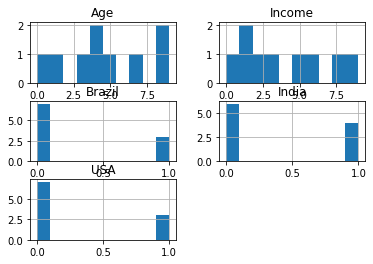

In [ ]:
data2.hist()

In [ ]:
import matplotlib.pyplot as plt

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

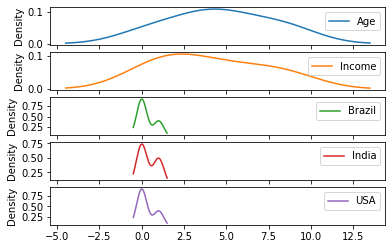

In [ ]:
data2.plot(kind='density', subplots=True)

<AxesSubplot:>

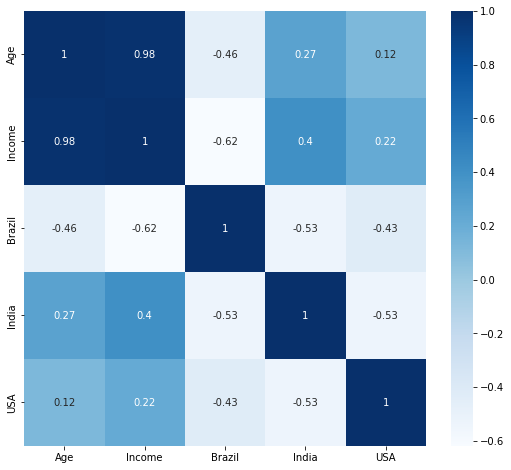

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,8))
corr = data2.corr()
sns.heatmap(data=corr, cmap='Blues', annot=True)

In [ ]:
data.corr()

,Age,Income
Age,1.000000,0.982495
Income,0.982495,1.000000


# With Movie Dataset

In [ ]:
CSV_Link = '/work/Labs/lab1/dataset/moviedata.csv'

In [ ]:
data = pd.read_csv(CSV_Link)
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
data2 = data.copy()

data2 = imp.fit_transform(data2, )
data2 = pd.DataFrame(data2, columns=['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,1.0,90.0,131.0,1000.0,Rob Walker,131.0,3000000.0,Documentary,...,1.0,English,USA,R,20000000.0,2009.0,12.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,3000000.0,Comedy|Drama,...,6.0,English,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84
5039,Color,Steven Spielberg,43.0,43.0,0.0,319.0,Valorie Curry,841.0,3000000.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,20000000.0,2009.0,593.0,7.5,16.0,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,3000000.0,Drama|Horror|Thriller,...,3.0,English,USA,R,1400.0,2013.0,0.0,6.3,2.35,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660


In [ ]:
data2[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews','budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes' ]] = data2[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews','budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes' ]].astype(float)

In [ ]:
data2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,Color,Doug Walker,1.0,90.0,131.0,1000.0,Rob Walker,131.0,3000000.0,Documentary,...,1.0,English,USA,R,20000000.0,2009.0,12.0,7.1,2.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,3000000.0,Comedy|Drama,...,6.0,English,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84.0
5039,Color,Steven Spielberg,43.0,43.0,0.0,319.0,Valorie Curry,841.0,3000000.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,20000000.0,2009.0,593.0,7.5,16.00,32000.0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,3000000.0,Drama|Horror|Thriller,...,3.0,English,USA,R,1400.0,2013.0,0.0,6.3,2.35,16.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660.0


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

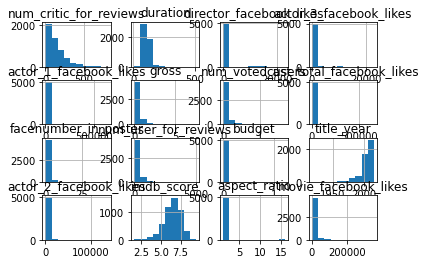

In [ ]:
data2.hist()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

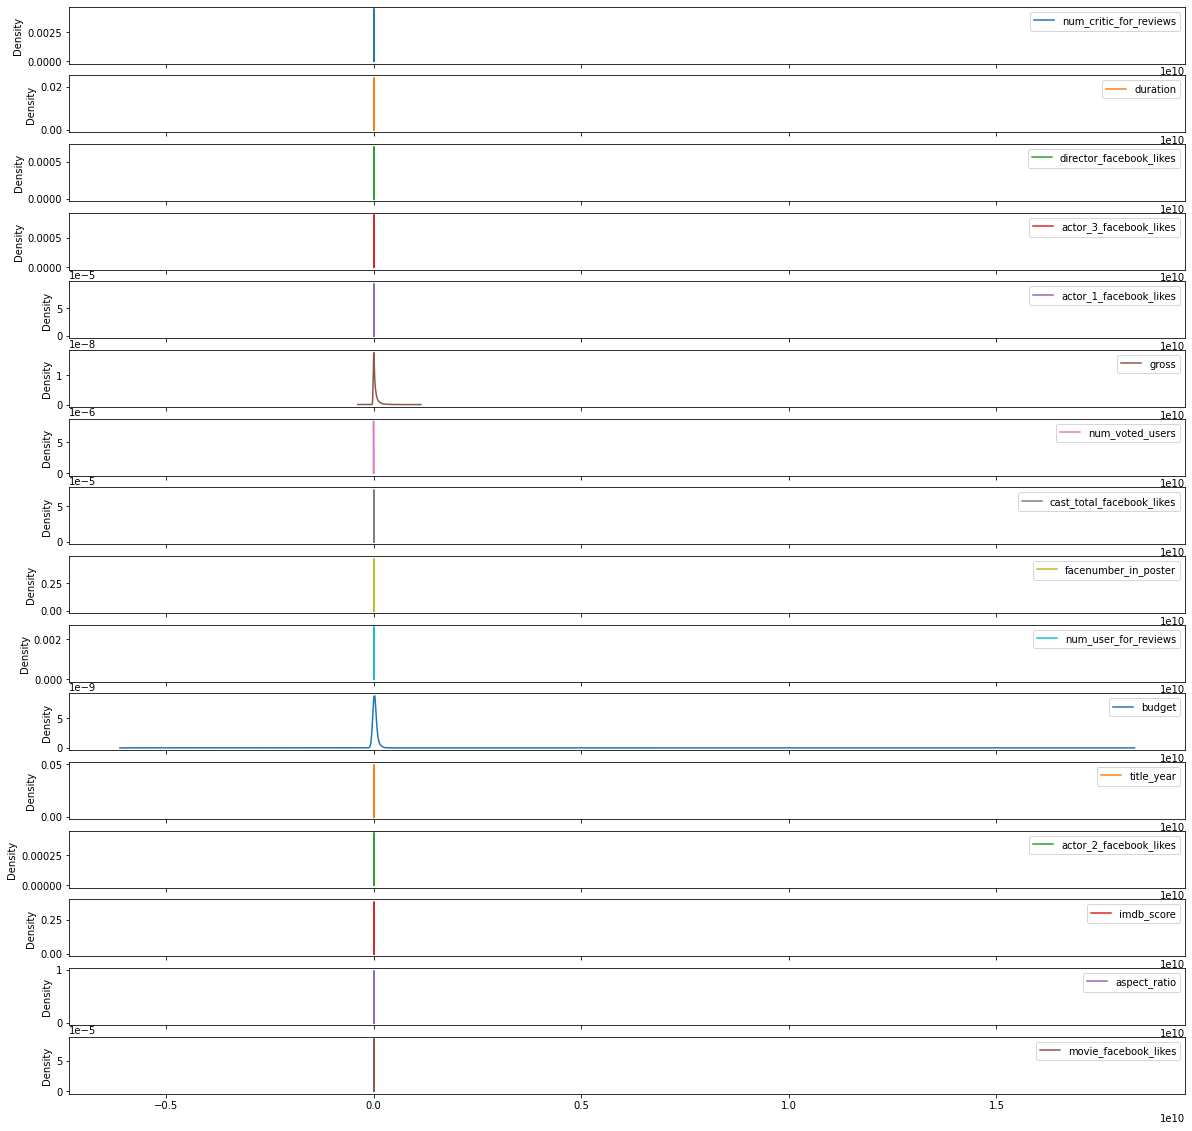

In [ ]:
import matplotlib.pyplot as plt
data2.plot(kind='density', subplots=True, figsize=(20,20))

<AxesSubplot:>

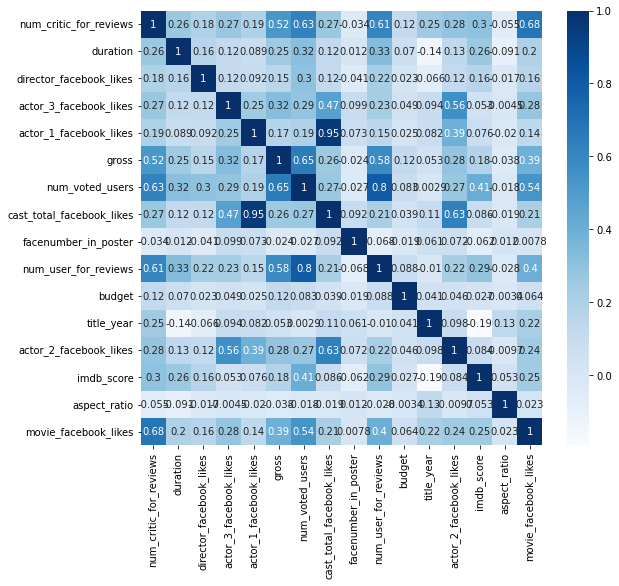

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,8))
corr = data2.corr()
sns.heatmap(data=corr, cmap='Blues', annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5ba1956-2aa0-49ed-9952-f1c7a30328f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>